<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Module-2-Week-1-IP/blob/main/Football_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mchezopesa Limited Footbal Prediction**
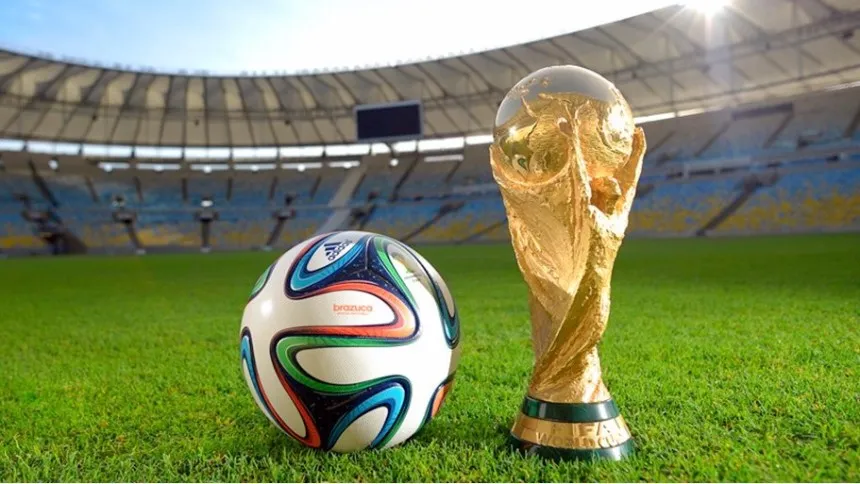

## 1. Defining the Question

### a) Specifying the Question

Mchezopesa Ltd wishes to predict the result of a game beween team 1 and team 2. Team 1 being the home team and team 2 being the away team. The following predictions are required.
1. Prediction of goals scored by the home team.
2. Prediction of goals scored by the away team.
3. Prediction of the status (win, draw or loss), of the home team.



### b) Defining the Metric for Success

1. To predict the goals scored by the home team, with a prediction model RMSE < 1.
2. To predict the goals scored by the away team, with a prediction model RMSE < 1.
3. To predict the match result (status) of the home team with a minimum accuracy of 90%.

### c) Understanding the context 

Mchezopesa Ltd. aims to predict the scores of home and away teams, as well as the final result of the match (W, L, D), in relation to the home team. Numerous tournaments have been included in the study, such as FIFA, UEFA and friendlies. The study also covers teams from the around the world.

The study prediction results need to be highly accurate as the information can be used for betting. Therefore, to satisfy clients and preserve the reputation of the company, the prediction results need to have a high accuracy.

### d) Recording the Experimental Design

The following list depicts the steps to be undertaken during the project.

1. Data sourcing/loading.
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preperation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Modeling
10. Implementing the solution
11. Challenging the solution
12. Conclusion
13. Follow up questions.


### e) Data Relevance

1. The data should have variables that adequately contribute to predicting the match results.
2. The dataset should lead to a high model fit (high accuracy and low error), after all possible model optimization procedures have been applied.

## 2. Reading the Data

In [182]:
# Imports
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, RidgeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from scipy.stats import bartlett, chi2, loguniform
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os
# Using seaborn style defaults and setting the default figure size
sns.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [183]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Core/Machine Learning/Moringa Core Module 2 Week 1 IP')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
# Loading the Dataset
fifa = pd.read_csv('fifa_ranking.csv', parse_dates = ['rank_date'])
results = pd.read_csv('results.csv',  parse_dates = ['date'])

## 3. Checking the Data

**Number of records**

In [185]:
# Number of records in the datasets
print(f'FIFA dataset: records = {fifa.shape[0]} and columns = {fifa.shape[1]}')
print(f'Results dataset: records = {results.shape[0]} and columns = {results.shape[1]}')

FIFA dataset: records = 57793 and columns = 16
Results dataset: records = 40839 and columns = 9


**Dataset top preview**

In [186]:
# Previewing the top of our dataset
# FIFA
fifa.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [187]:
# Resuts
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**Dataset bottom preview**

In [188]:
# Previewing the bottom of our dataset
# FIFA
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [189]:
# Results
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


**Checking datatypes**

In [190]:
# Checking whether each column has an appropriate datatype
# FIFA 
fifa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [191]:
# Results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


No datatypes need to be changed.

## 4. External Data Source Validation

The datasouces are valid, and their values are similar to those found in the main FIFA website [link](https://www.fifa.com/fifa-world-ranking/men?dateId=id13603) and those found in Wikipedia [link](https://en.wikipedia.org/wiki/FIFA_World_Rankings).

## 5. Data Preperation

### a.Validation

**Column relevance**

In [192]:
# Checking for irrelevant columns
# FIFA dataset
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [193]:
# Results dataste
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

The city, country and neutral columns columns will be dropped after merging the datasets. The first two have information that is already captured in the home and awat team columns, while the last column is not relevant to the study.

### b. Completeness

In [194]:
# Checking for missing values
# FIFA dataset
fifa.isnull().any().any()

False

In [195]:
# Results dataset
results.isnull().any().any()

False

There are no missing values.

### c. Consistency

In [196]:
# Checking for duplicates
# FIFA dataset
fifa.duplicated().any().any()

True

In [197]:
# Dropping duplicates
fifa.drop_duplicates(inplace = True)
# Checking changes
fifa.duplicated().any().any()

False

In [198]:
# Results dataset
results.duplicated().any().any()

False

There are no duplicates in both datasets.

### d. Uniformity

In [199]:
# Checking column names
# FIFA dataset
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [200]:
# Results dataset
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

The column names are uniform.

### e. Outliers

In [201]:
# Outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [202]:
# FIFA dataset
outliers(fifa)

Number of outliers = 21235
Percentage = 36.76674284922778%


In [203]:
# Results dataset
outliers(results)

Number of outliers = 5683
Percentage = 13.915619873160459%


Outliers will be retained until after merging is done.

**Brief exploration of the datasets**

In [204]:
# Checking unique years in both datasets
fifa.rank_date.dt.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [205]:
# Results dataset
results.date.dt.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

There are fewer years in the fifa dataset, therefore, some ranks will not be available for some records in the results dataset.

Checking records for selected years in both datasets.

In [206]:
# FIFA dataset - 2015
len(fifa[fifa.rank_date.dt.year == 2015]['country_full'].unique())

209

In [207]:
# Results dataset -2015
len(results[results.date.dt.year == 2015]['country'])

1003

In [208]:
# FIFA dataset - 2018
fifa[(fifa.rank_date.dt.year == 2018) & (results.country == 'Germany')][['country_full', 'rank', 'rank_date']].sort_values('country_full')

,country_full,rank,rank_date


In [209]:
# Results dataset - 2018
results[(results.date.dt.year == 2018) & (results.country == 'Germany')][['country', 'date', 'tournament']].sort_values('country')

,country,date,tournament
39579,Germany,2018-03-23,Friendly
39646,Germany,2018-03-27,Friendly
39834,Germany,2018-06-08,Friendly
39952,Germany,2018-09-06,UEFA Nations League
40018,Germany,2018-09-09,Friendly
40213,Germany,2018-11-15,Friendly
40273,Germany,2018-11-19,UEFA Nations League


From the results above, the records do not match, therefore, the merged dataset will contain fewer records when an inner join is performed, so as to obtain the rank column, which is only present in the fifa dataset.

In [210]:
# Copy of the FIFA dataset used to obtain the ranks for the away team during merging
fifa2 = fifa.copy()

In [211]:
# Merging of the results dataset to the two fifa dataframes
merged = pd.merge(pd.merge(results,fifa[['rank', 'country_full','rank_date']], 
                           how = 'inner', left_on= ['date', 'home_team'], 
                           right_on= ['rank_date','country_full']), fifa2[['rank', 'country_full','rank_date']], 
                          how = 'inner', left_on= ['date', 'away_team'], 
                          right_on= ['rank_date','country_full'])

# Dataframe shape
merged.shape

(871, 15)

In [212]:
# Merged dataset with all columns in both datasets, with respest to the home team.
# Merging of the results dataset to the two fifa dataframes
merged_complete = pd.merge(pd.merge(results,fifa, 
                           how = 'inner', left_on= ['date', 'home_team'], 
                           right_on= ['rank_date','country_full']), fifa2, 
                          how = 'inner', left_on= ['date', 'away_team'], 
                          right_on= ['rank_date','country_full'])

# Dataframe shape
merged_complete.shape

(871, 41)

In [213]:
# Merged dataframe preview - target dataframe
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_x,country_full_x,rank_date_x,rank_y,country_full_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,1993-08-08,22,Uruguay,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,Brazil,1993-08-08,14,Mexico,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,1993-08-08,94,Venezuela,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,1993-08-08,86,Sierra Leone,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,Paraguay,1993-08-08,5,Argentina,1993-08-08


In [214]:
# Dropping duplicate columns
merged.drop(['country_full_x', 'country_full_y', 'rank_date_x', 'rank_date_y', 'country', 'city', 'neutral'], axis = 1, inplace = True)

In [215]:
# Renaming columns
merged.columns.values[-2:] = ['home_team_rank', 'away_team_rank']
# Confirming changes
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,14
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,86
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5


In [216]:
# Adding a status column
merged['status'] = ''
# Score difference
difference = merged.home_score - merged.away_score
# Filling the status column (W = win, D = draw and L = loss) with resprect to the home team
merged.loc[(merged.home_score - merged.away_score > 0), 'status'] = 'W'
merged.loc[(merged.home_score - merged.away_score == 0), 'status'] = 'D'
merged.loc[(merged.home_score - merged.away_score < 0), 'status'] = 'L'
# Checking changes
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,W
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,14,D
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,W
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,86,W
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5,L


In [217]:
# Second dataset
# Columns
merged_complete.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_x', 'country_full_x',
       'country_abrv_x', 'total_points_x', 'previous_points_x',
       'rank_change_x', 'cur_year_avg_x', 'cur_year_avg_weighted_x',
       'last_year_avg_x', 'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'rank_y',
       'country_full_y', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y', 'rank_date_y'],
      dtype='object')

In [218]:
# Dropping unnecessary columns
merged_complete.drop(['country', 'country_full_x', 'country_full_y',
                      'country_abrv_x', 'country_abrv_y', 'rank_date_x', 
                      'rank_date_y' ], axis = 1, inplace =True)

In [219]:
# Checking changes
merged_complete.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'rank_x', 'total_points_x',
       'previous_points_x', 'rank_change_x', 'cur_year_avg_x',
       'cur_year_avg_weighted_x', 'last_year_avg_x',
       'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_y',
       'total_points_y', 'previous_points_y', 'rank_change_y',
       'cur_year_avg_y', 'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y'],
      dtype='object')

In [220]:
# Renaming columns
merged_complete.rename(columns = {'rank_x':'home_team_rank',
                                  'total_points_x':'home_team_total_points', 
                                  'previous_points_x':'home_team_previous_points',
                                  'rank_change_x':'home_team_rank_change',
                                  'cur_year_avg_x':'home_team_cur_year_avg',
                                  'cur_year_avg_weighted_x':'home_team_cur_year_avg_weighted',
                                  'last_year_avg_x':'home_team_last_year_avg',
                                  'last_year_avg_weighted_x':'home_team_last_year_avg_weighted',
                                  'two_year_ago_avg_x':'home_team_two_year_ago_avg',
                                  'two_year_ago_weighted_x':'home_team_two_year_ago_weighted',
                                  'three_year_ago_avg_x':'home_team_three_year_ago_avg',
                                  'three_year_ago_weighted_x':'home_team_three_year_ago_weighted',
                                  'confederation_x':'home_team_confederation',
                                  'rank_y':'away_team_rank', 'total_points_y':'away_team_total_points',
                                  'previous_points_y':'away_team_previous_points',
                                  'rank_change_y':'away_team_rank_change',
                                  'cur_year_avg_y':'away_team_cur_year_avg',
                                  'cur_year_avg_weighted_y':'away_team_cur_year_avg_weighted',
                                  'last_year_avg_y':'away_team_last_year_avg',
                                  'last_year_avg_weighted_y':'away_team_last_year_avg_weighted',
                                  'two_year_ago_avg_y':'away_team_two_year_ago_avg',
                                  'two_year_ago_weighted_y':'away_team_two_year_ago_weighted',
                                  'three_year_ago_avg_y':'away_team_three_year_ago_avg',
                                  'three_year_ago_weighted_y':'away_team_three_year_ago_weighted',
                                  'confederation_y':'away_team_confederation'}, inplace = True)

In [221]:
# Confirming changes have been made
merged_complete.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'home_team_rank',
       'home_team_total_points', 'home_team_previous_points',
       'home_team_rank_change', 'home_team_cur_year_avg',
       'home_team_cur_year_avg_weighted', 'home_team_last_year_avg',
       'home_team_last_year_avg_weighted', 'home_team_two_year_ago_avg',
       'home_team_two_year_ago_weighted', 'home_team_three_year_ago_avg',
       'home_team_three_year_ago_weighted', 'home_team_confederation',
       'away_team_rank', 'away_team_total_points', 'away_team_previous_points',
       'away_team_rank_change', 'away_team_cur_year_avg',
       'away_team_cur_year_avg_weighted', 'away_team_last_year_avg',
       'away_team_last_year_avg_weighted', 'away_team_two_year_ago_avg',
       'away_team_two_year_ago_weighted', 'away_team_three_year_ago_avg',
       'away_team_three_year_ago_weighted', 'away_team_confederation'],
      dtype='object')

In [222]:
# Grouping by continent, for thetarget dataset (first merged dataframe)

# Loading dataset
continents = pd.read_html('https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv')
continents = continents[0]
# Dataset preview
continents.head()

,Unnamed: 0,Continent,Country
0,NaN,Africa,Algeria
1,NaN,Africa,Angola
2,NaN,Africa,Benin
3,NaN,Africa,Botswana
4,NaN,Africa,Burkina


In [223]:
# Removing unnecessary column
continents.drop('Unnamed: 0', axis = 1, inplace = True)

In [224]:
# Confirming changes and checking information
continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  194 non-null    object
 1   Country    194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [225]:
# 7 continents
continents.Continent.unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [226]:
# List of countries in each continent
africa = list(continents[continents['Continent'] == 'Africa']['Country'])
asia = list(continents[continents['Continent'] == 'Asia']['Country'])
europe = list(continents[continents['Continent'] == 'Europe']['Country'])
oceania = list(continents[continents['Continent'] == 'Oceania']['Country'])
north_america = list(continents[continents['Continent'] == 'North America']['Country'])
south_america = list(continents[continents['Continent'] == 'South America']['Country'])
continents = [africa, asia, europe, oceania, north_america, south_america]

In [227]:
# Adding a continent columns
merged['home_team_continent'] = ''
merged['away_team_continent'] = ''

In [228]:
# Target list
conts = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America']

In [229]:
# Assigning a continent to each team (home and away)
def Continents(continents, source, target, list, data):
  for i, continent in enumerate(continents):
    data.loc[(data[source].apply(lambda x: x in continent)), [target]]= list[i]

In [230]:
# Function call
# Home Team
Continents(continents, 'home_team', 'home_team_continent', conts, merged)
# Away Team
Continents(continents, 'away_team', 'away_team_continent', conts, merged)

In [231]:
# Confirming changes
# Home team
merged['home_team_continent'].unique()

array(['South America', 'Africa', 'Asia', '', 'Europe', 'Oceania',
       'North America'], dtype=object)

In [232]:
# Checking missing continents for the home team.
merged[merged['home_team_continent'] == '']['home_team'].unique()

array(['England', 'Burkina Faso', 'Czech Republic', 'Northern Ireland',
       'Russia', 'Republic of Ireland', 'Scotland', 'Faroe Islands',
       'Macau', 'China PR', 'Wales', 'Hong Kong', 'Palestine',
       'American Samoa', 'Bermuda', 'Guam', 'Montserrat'], dtype=object)

In [233]:
# Checking missing continents for the away team.
merged[merged['away_team_continent'] == '']['home_team'].unique()

array(['Belgium', 'Czech Republic', 'Denmark', 'Switzerland', 'Slovakia',
       'Turkey', 'Greece', 'Slovenia', 'Bosnia and Herzegovina', 'Sweden',
       'Oman', 'Brazil', 'England', 'Belarus', 'Japan', 'Croatia',
       'Finland', 'Iceland', 'Malta', 'Poland', 'Italy', 'Thailand',
       'Australia', 'Cyprus', 'Republic of Ireland', 'Netherlands',
       'France', 'Azerbaijan', 'Portugal', 'Burundi', 'Bhutan', 'Benin',
       'Qatar', 'Singapore', 'Wales', 'Haiti', 'Malaysia', 'Palestine',
       'Andorra', 'Solomon Islands', 'Iraq', 'Kuwait', 'Uzbekistan',
       'Austria', 'Latvia', 'Morocco', 'Bulgaria', 'Mali', 'Bermuda',
       'Estonia', 'Honduras', 'Lithuania', 'Syria', 'San Marino', 'Spain',
       'Albania', 'Hungary', 'Scotland', 'Mauritania', 'Montenegro',
       'Afghanistan', 'Vietnam', 'Cambodia', 'China PR', 'Mexico'],
      dtype=object)

In [234]:
# Variables used to assign continents values depending on the country missing
# from the continents dataset (may have different country name format)
africa2 = ['Burkina Faso', 'Burundi', 'Benin', 'Morocco','Mali', 'Mauritania']
asia2 = ['Russia', 'Macau', 'China PR', 'Hong Kong', 'Oman', 'Turkey', 'Japan',
         'Thailand', 'Azerbaijan', 'Qatar', 'Singapore', 'Malaysia', 'Kuwait',
         'Uzbekistan', 'Syria', 'Afghanistan', 'Cambodia', 'Iraq', 'Palestine',
         'Chinese Taipei']
europe2 = ['Czech Republic', 'England', 'Northern Ireland',
           'Republic of Ireland', 'Scotland', 'Faroe Islands', 'Wales',
           'Belgium', 'Denmark', 'Switzerland', 'Slovakia',
       'Greece', 'Slovenia', 'Bosnia and Herzegovina', 'Sweden', 'Belarus',
        'Croatia', 'Finland', 'Iceland', 'Malta', 'Poland', 'Italy', 'Cyprus',
         'Netherlands', 'France', 'Portugal', 'Andorra', 'Austria', 'Latvia',
         'Bulgaria', 'Estonia', 'Lithuania', 'Spain', 'Albania', 'Hungary', 'Scotland',
         'Montenegro']
north_america2 = ['Bermuda', 'Haiti', 'Honduras', 'Mexico',
                  'Turks and Caicos Islands', 'Puerto Rico', 'Montserrat']
south_america2 = ['Brazil']
oceania2 = ['Solomon Islands', 'Cook Islands', 'American Samoa', 'Guam']
continents2 = [africa2, asia2, europe2, oceania2, north_america2, south_america2]

In [235]:
# Implementaion
# Home team
Continents(continents2, 'home_team', 'home_team_continent', conts, merged)

In [236]:
# Away team
Continents(continents2, 'away_team', 'away_team_continent', conts, merged)

In [237]:
# Checking changes
# Home team
merged['home_team_continent'].unique()

array(['South America', 'Africa', 'Asia', 'Europe', 'Oceania',
       'North America'], dtype=object)

In [238]:
# Away team
merged['away_team_continent'].unique()

array(['South America', 'North America', 'Africa', 'Europe', 'Oceania',
       'Asia'], dtype=object)

All changes have been implemented.

## 6. Exploratory Analysis

### Descriptive Analysis

#### a) Univariate Analysis

In [239]:
# Categorical columns
nominal = merged.select_dtypes(include = 'object').columns.tolist()
nominal

['home_team',
 'away_team',
 'tournament',
 'status',
 'home_team_continent',
 'away_team_continent']

In [240]:
# Numerical columns
numerical = merged.select_dtypes(exclude = 'object').columns.tolist()
numerical.remove('date')
numerical

['home_score', 'away_score', 'home_team_rank', 'away_team_rank']

##### Categorical

In [241]:
# Categorical Plots
def CatPlots(column, data):
  fig,ax  = plt.subplots(figsize = (10,5))
  sns.countplot(data[column], palette = 'viridis', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

As columns like the home and away team have a large number of categories, the value counts will be computed to check the frequencies of the categories.

**Home Team**

In [242]:
# Home team
merged.home_team.value_counts()

Mexico          23
Estonia         15
Saudi Arabia    15
Portugal        15
Greece          14
                ..
Haiti            1
Canada           1
Indonesia        1
Palestine        1
Grenada          1
Name: home_team, Length: 160, dtype: int64

Mexico had the highest number of record entries as the home team.

**Away Team**

In [243]:
# Away team
merged.away_team.value_counts()

Uruguay                     15
Argentina                   15
Kuwait                      14
Israel                      13
Bulgaria                    13
                            ..
Eritrea                      1
Tajikistan                   1
Turks and Caicos Islands     1
Sierra Leone                 1
Mongolia                     1
Name: away_team, Length: 159, dtype: int64

Uruguay and Argentina had the highest number of away team records.

**Tournament**

In [244]:
# Tournament
merged.tournament.value_counts()

Friendly                                      574
FIFA World Cup qualification                  134
UEFA Euro qualification                        37
AFC Asian Cup qualification                    31
Cyprus International Tournament                 8
Gulf Cup                                        7
AFF Championship                                7
CECAFA Cup                                      6
Copa América                                    6
African Cup of Nations qualification            5
Gold Cup                                        5
African Cup of Nations                          4
AFC Asian Cup                                   4
SAFF Cup                                        4
African Nations Championship                    3
Malta International Tournament                  3
United Arab Emirates Friendship Tournament      3
King's Cup                                      3
CFU Caribbean Cup                               2
Merdeka Tournament                              2


Most tournaments were friendly matches, followed by the FIFA World Cup qualification, UEFA Euro qualification and the AFC Asian Cup qualification.

**Status**

In [245]:
# Status
merged.status.value_counts()

W    420
D    226
L    225
Name: status, dtype: int64

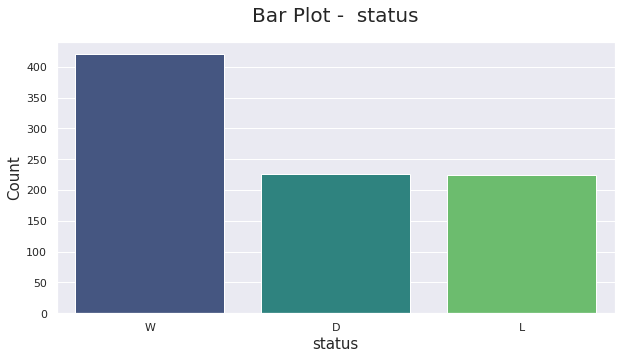

In [246]:
# Status countplot
CatPlots('status', merged)

Wins had the highest frequency. Therefore, there is a class imbalance between the wins, and the draws and losses.

**Dates**

In [247]:
 # Date plots
def dates(date, column): 
  fig, ax = plt.subplots(figsize = (18, 5))
  sns.countplot(date, palette = 'viridis', orient = 'v')
  ax.set_title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  ax.set_xlabel(column, fontsize=15)
  ax.set_ylabel('Count', fontsize=15)
  plt.show()

*Year*

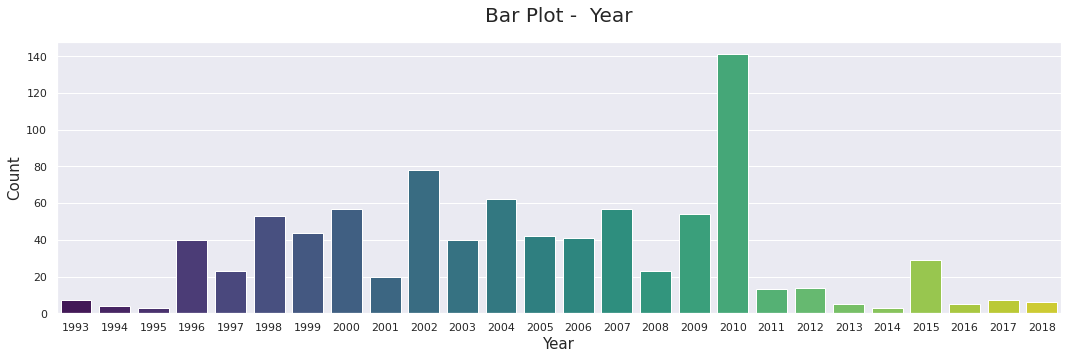

In [248]:
# Year frequency
dates(merged.date.dt.year, 'Year')

2010 had the highest frequency. This could mean that the year had the highest number of football matches.

*Month*

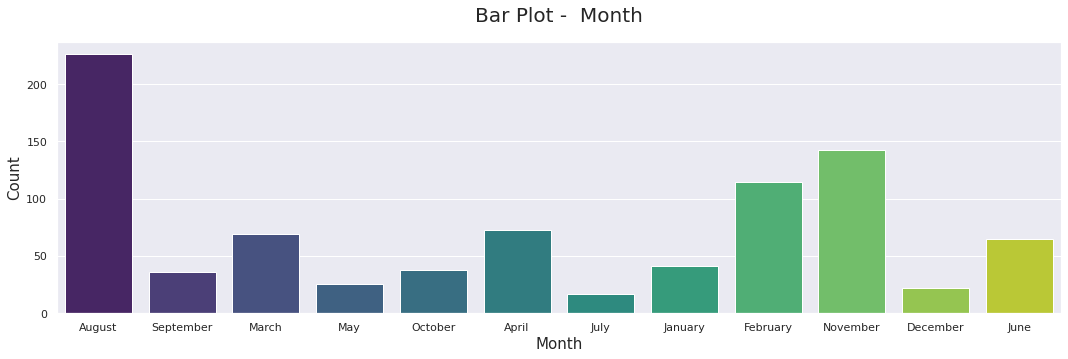

In [249]:
# Month frequency
dates(merged.date.dt.month_name(), 'Month')

The month of August had the highest number of matches.

*Day*

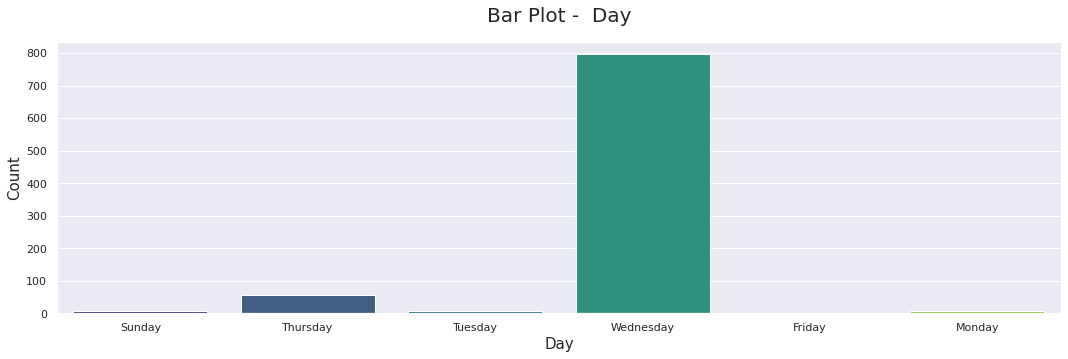

In [250]:
# Day Frequency
dates(merged.date.dt.day_name(), 'Day')

Most matches were held on Wednesday.

**Continent**

*Home Team*

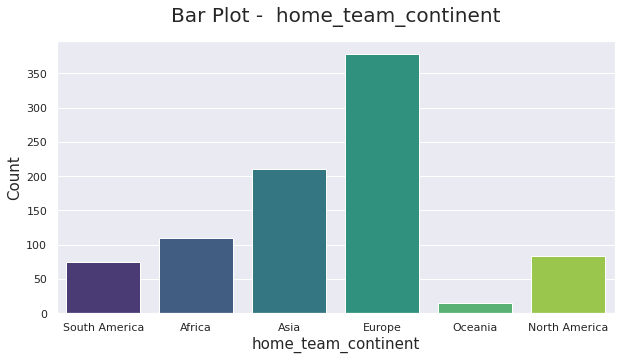

In [251]:
# Home Team Continent catplot
CatPlots('home_team_continent', merged)

European teams form the majority of the home teams.

*Away Team*

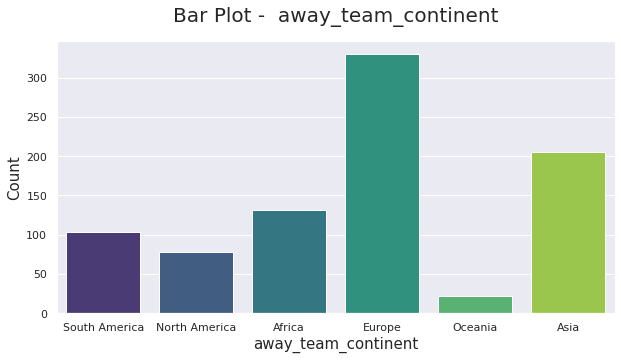

In [252]:
# AwayTeam Continent catplot
CatPlots('away_team_continent', merged)

European teams also form the majority of the away teams.

##### Numerical

In [253]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [254]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")


In [255]:
# Distribution and Boxplot plot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sns.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sns.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [256]:
# Mean
MeasureCentral('mean', numerical, merged)

home_score column mean = 1.632606199770379
away_score column mean = 1.0045924225028702
home_team_rank column mean = 65.54994259471871
away_team_rank column mean = 69.91848450057405


In [257]:
# Median
MeasureCentral('median', numerical, merged)

home_score column median = 1.0
away_score column median = 1.0
home_team_rank column median = 58.0
away_team_rank column median = 61.0


The mean is greater than the median for all columns, therefore, the distributions are positively skewed.

In [258]:
# Mode
MeasureCentral('mode', numerical, merged)

home_score column mode = 0    1
dtype: int64
away_score column mode = 0    0
dtype: int64
home_team_rank column mode = 0    33
dtype: int64
away_team_rank column mode = 0    20
1    30
2    36
dtype: int64


1. Most home teams scored 0 or 1 goals
2. Most away teams did not score during matches.
3. The most common home rank is 33.
4. The most common away rank is 20.

In [259]:
# Range
MeasureDistribution('range', numerical, merged)

home_score column range = 31
away_score column range = 9
home_team_rank column range = 205
away_team_rank column range = 208


In [260]:
# IQR
MeasureDistribution('IQR', numerical, merged)

home_score column IQR = 2.0
away_score column IQR = 2.0
home_team_rank column IQR = 68.0
away_team_rank column IQR = 74.5


The home team rank and the away team rank have the largest ranges.

In [261]:
# Variance
MeasureDistribution('var', numerical, merged)

home_score column variance = 3.632682740145451
away_score column variance = 1.3333122187471238
home_team_rank column variance = 2261.7627327553205
away_team_rank column variance = 2550.0128878155638


In [262]:
# Standard Deviation
MeasureDistribution('std', numerical, merged)

home_score column std = 1.9059597949971168
away_score column std = 1.1546913954590308
home_team_rank column std = 47.55799336342231
away_team_rank column std = 50.497652300038304


The home team and away team ranks have the highest standard deviations.

In [263]:
# Skew
MeasureDistribution('skew', numerical, merged)

home_score column skew = 5.524378027487251
away_score column skew = 1.74656856137909
home_team_rank column skew = 0.7530868154235779
away_team_rank column skew = 0.6669445275319614


All columns have a positive skew, however, it is most significant in the home scores column. The home team and away team ranks have close to normal distributions.

In [264]:
# Kurtosis
MeasureDistribution('kurt', numerical, merged)

home_score column kurt = 68.55786471188763
away_score column kurt = 5.240328362114057
home_team_rank column kurt = -0.1488295399350119
away_team_rank column kurt = -0.36177849504210124


1. The home and away scores are leptokurtic, with the home score having a higher peak.
2. The home and away ranks are platykutic, however, the kurtosis values are close to zero, therefore, close to being mesokurtic. 

**Outliers**

In [265]:
# Viewing outliers
outliers(merged)

Number of outliers = 32
Percentage = 3.6739380022962114%


The analysis will focus on common events, therefore, outliers will be removed. They also only form 3.6739% of the dataset, therefore, removing them will not greaty affect the analysis.

In [266]:
# Copy of orinial dataset
merged_with_outliers = merged.copy()
merged_with_outliers.shape

(871, 11)

In [267]:
# Removing outliers 
Q1 = merged[numerical].quantile(0.25)
Q3 = merged[numerical].quantile(0.75)
IQR = Q3 - Q1
merged =  merged[~ ((merged[numerical]< (Q1 - 1.5 * IQR)) |(merged[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]
merged.shape

(839, 11)

**Distribtion and Box Plots**

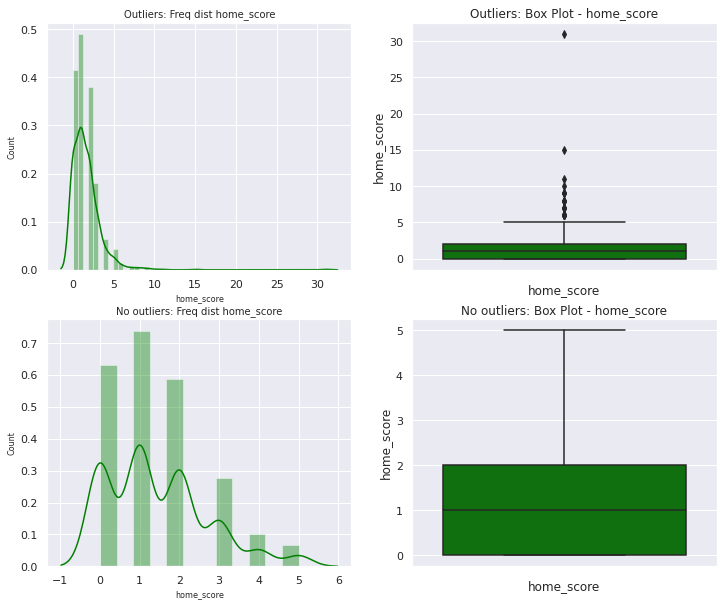

In [268]:
# Home score distribution and box plots before and after outliers are removed.
NumericalPlots(numerical[0], merged_with_outliers, merged)

Most home teams scored one goal during matches. 

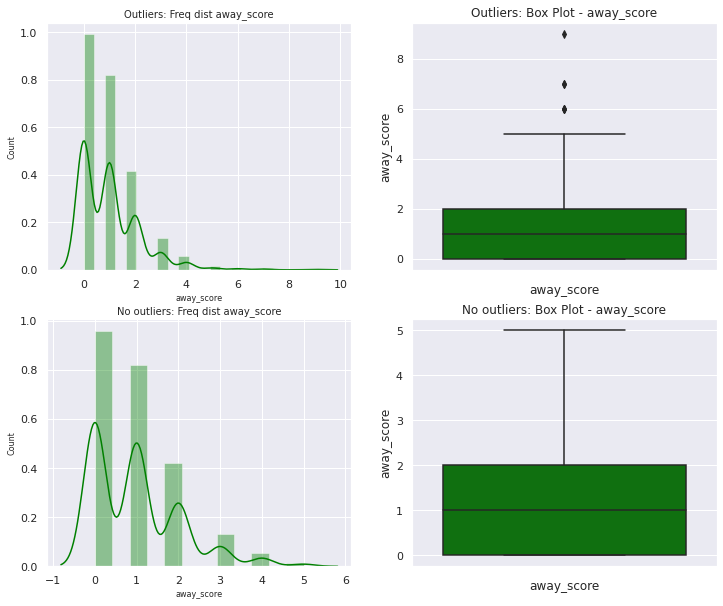

In [269]:
# Away score distribution and box plots before and after outliers are removed.
NumericalPlots(numerical[1], merged_with_outliers, merged)

Most away teams did not score during matches.

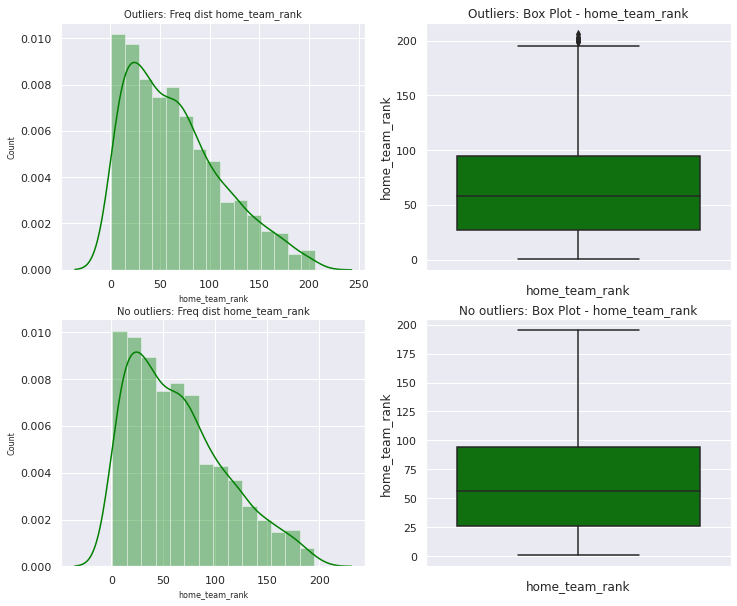

In [270]:
# Home team rank distribution and box plots before and after outliers are removed.
NumericalPlots(numerical[2], merged_with_outliers, merged)

Most home team ranks were lower than fifty. This could mean that the higher ranked teams engaged in more matches, or the dataset mostly contains records of the higher ranked teams.

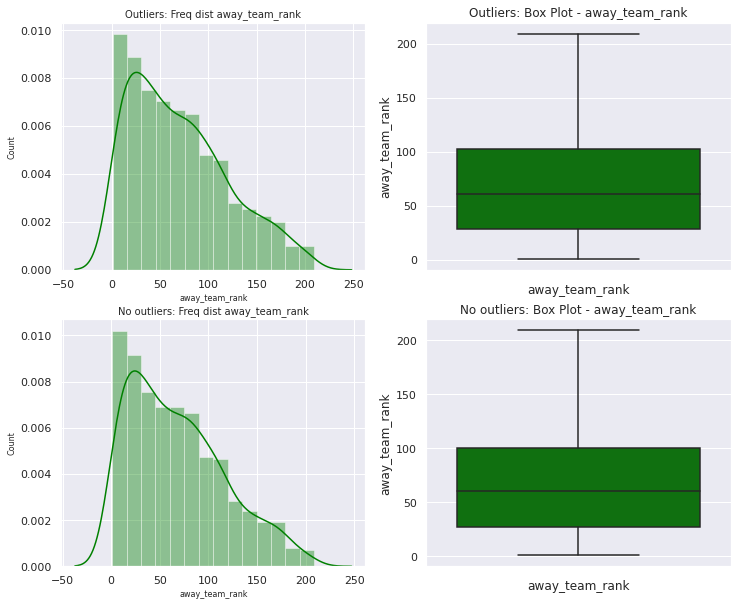

In [271]:
# Away team rank distribution and box plots before and after outliers are removed.
NumericalPlots(numerical[3], merged_with_outliers, merged)

The observation made above is applicable for the ranks of away teams.

#### b) Bivariate Analysis

##### Categorical-Categorical columns

In [272]:
# Function used to generate a crosstab before plotting a stacked bar chart.
def CrosstabPlot(x, y, data):  
  table = pd.crosstab(data[x], data[y])
  table.plot.bar(stacked = True, figsize = (30,5), color = ['b', 'g', 'y'])
  plt.title(f'{x} Vs {y}', y = 1.05, fontsize = 12)
  plt.xticks(rotation = 0)
  plt.xlabel(x, fontsize = 10)
  plt.ylabel(y, fontsize = 10)

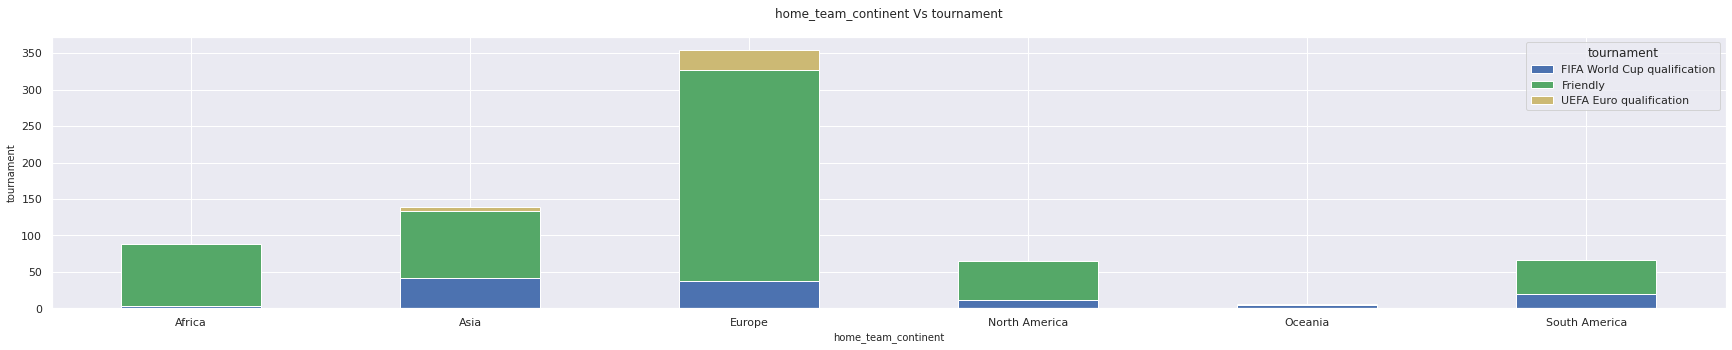

In [273]:
# Friendly, FIFA and UEFA
CrosstabPlot('home_team_continent', 'tournament',
             merged[(merged.tournament == 'Friendly') 
             | (merged.tournament == 'FIFA World Cup qualification') 
             | (merged.tournament == 'UEFA Euro qualification')])

* African  has the lowest FIFA world cup participation.
* The are some countries such as Russia that are part of two continents, that is Asia and Europe, that participate in the EUFA Euro qualification.
* Teams in continents apart from Oceania mostly participate in friendly matches.
* Oceania has the lowest number of tournaments, and as per the records, only participates in the FIFA World Cup.
* Asia, Europe and South America have the highest FIFA World Cup participation and matches. This could indicate that teams in these continents have a better performance in the tournament.

##### Numerical-Numerical Columns

In [274]:
# Pearson Correlation
def Corr(x,y,data):
  corr = data[[x,y]].corr()
  print(f'Correlation Matrix : \n{corr}')

In [275]:
# Numerical-numerical plots
def LineScatterPlots(x, y, data):
  fig, ax = plt.subplots(figsize = (15, 5))
  # sns.scatterplot(data[x], data[y], ax = ax[0], color = 'green')
  # ax[0].set_title(f'Scatter Plot: {x} - {y}', y = 1.05)
  sns.lineplot(data[x], data[y], color = 'green', marker='o', ci=None)
  plt.title(f'Line Plot: {x} - {y}', y = 1.05)
  plt.show()
  correlation = Corr(x, y, data)  

In [276]:
# Numerical columns
numerical

['home_score', 'away_score', 'home_team_rank', 'away_team_rank']

**Score Vs Rank**

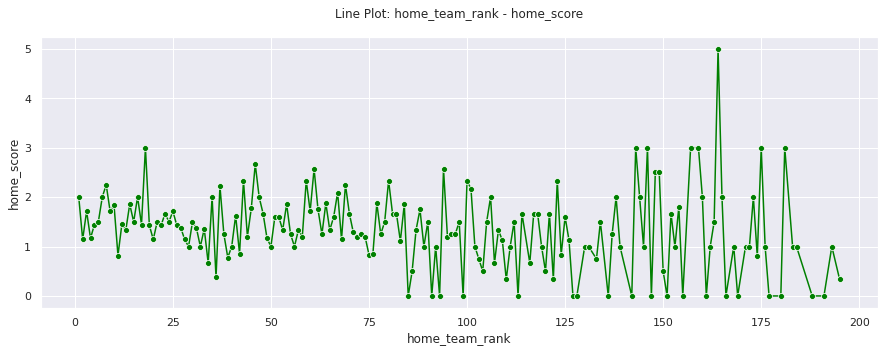

Correlation Matrix : 
                home_team_rank  home_score
home_team_rank        1.000000   -0.097959
home_score           -0.097959    1.000000


In [277]:
# Home team score vs rank
LineScatterPlots(numerical[2], numerical[0], merged)

The home score and home team rank have a very weak negative correlation to each other.

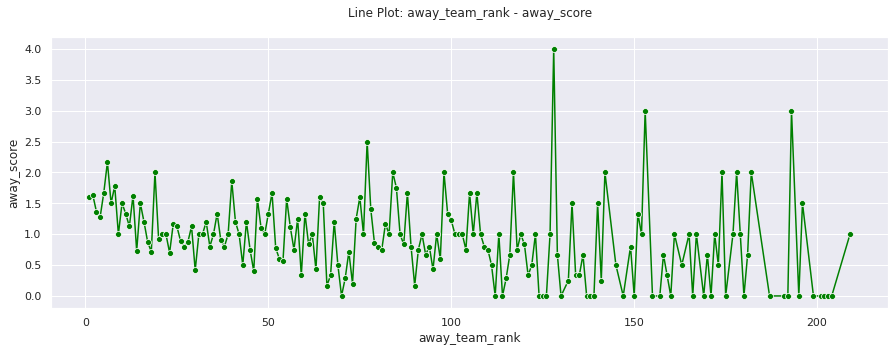

Correlation Matrix : 
                away_team_rank  away_score
away_team_rank        1.000000   -0.178891
away_score           -0.178891    1.000000


In [278]:
# Away team score vs rank
LineScatterPlots(numerical[3], numerical[1], merged)

The away score and away team rank have a very weak negative correlation to each other.

**Score Vs Score**

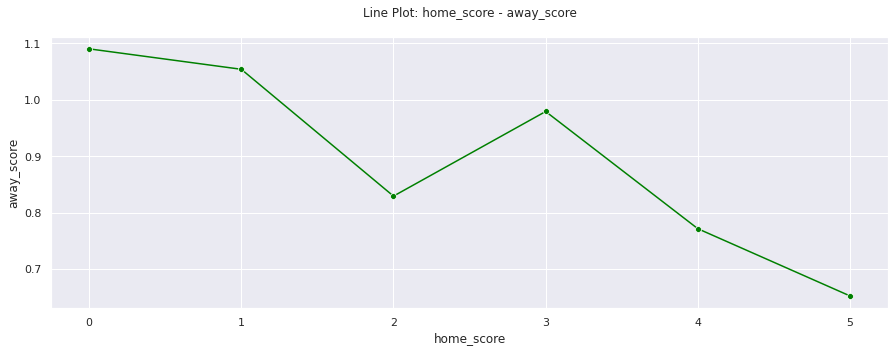

Correlation Matrix : 
            home_score  away_score
home_score    1.000000   -0.096488
away_score   -0.096488    1.000000


In [279]:
# Home team score vs away team score
LineScatterPlots(numerical[0], numerical[1], merged)

The correlation between the home team score and the away team score in very weak and negative.

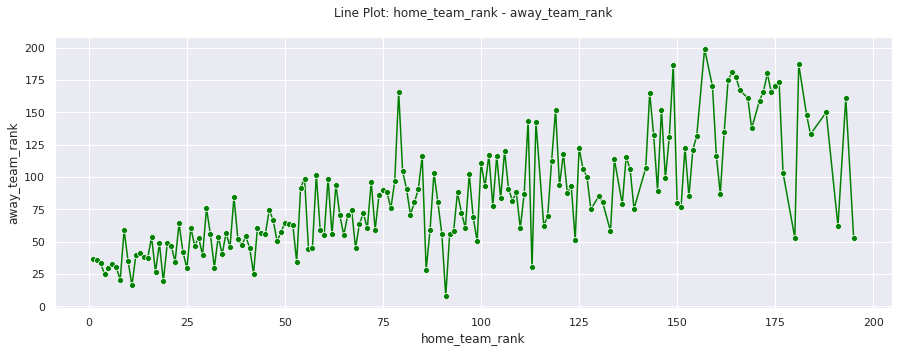

Correlation Matrix : 
                home_team_rank  away_team_rank
home_team_rank        1.000000        0.533732
away_team_rank        0.533732        1.000000


In [280]:
# Home team rank vs away team rank
LineScatterPlots(numerical[2], numerical[3], merged)

The correlation between the home team and away team ranks are moderately strong and positive.

Heat-Map

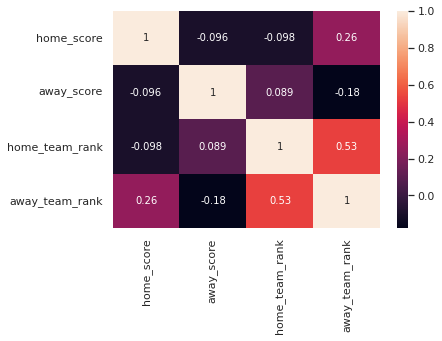

In [281]:
# Correlation heatmap
sns.heatmap(merged.corr(), annot = True)

The away team and home team ranks have moderate correlation. They will be retained as they are necessary for the project. They will only be removed if the VIF scores are greater than 5 to reduce multicollinearity.

##### Numerical-Categorical

In [282]:
# Bar plot function
def BarPlotBiv(x,y, data):
  fig, ax = plt.subplots(figsize = (10,5))
  sns.barplot(data[x], data[y], palette = 'viridis')
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.show()

**Score Vs Status**

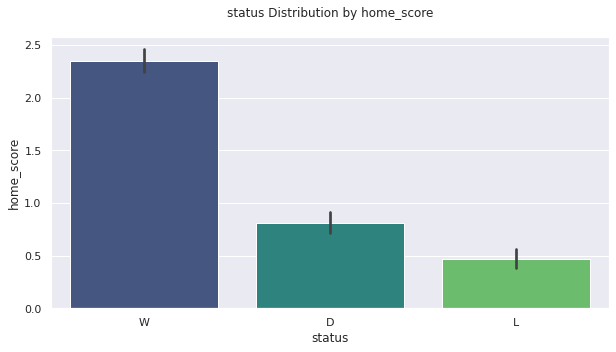

In [283]:
# Home score vs status
BarPlotBiv('status', 'home_score', merged)

Most home scores led to wins, with the least being losses. Therefore, teams seem to be performing better in their home stadiums.

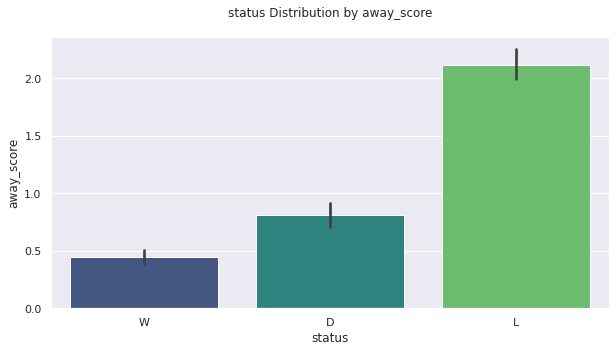

In [284]:
# Away score vs status
BarPlotBiv('status', 'away_score', merged)

Opposite to the previous observations, most teams suffer losses when playing in foreign stadiums.

**Rank Vs Status**

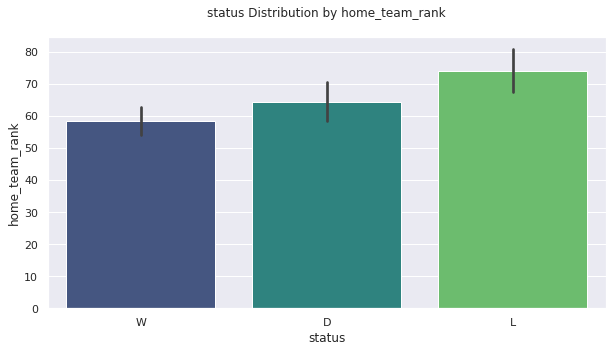

In [285]:
# Home team rank vs status
BarPlotBiv('status', 'home_team_rank', merged)

Home teams with high losses have lower ranks.

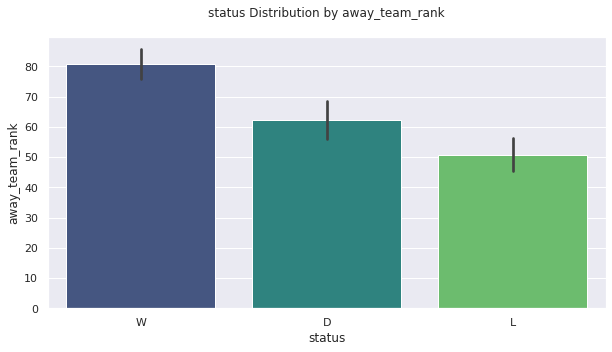

In [286]:
# Away team rank vs status
BarPlotBiv('status', 'away_team_rank', merged)

For away teams, the lower the rank the higher the number of wins.

**Continent Vs Score**

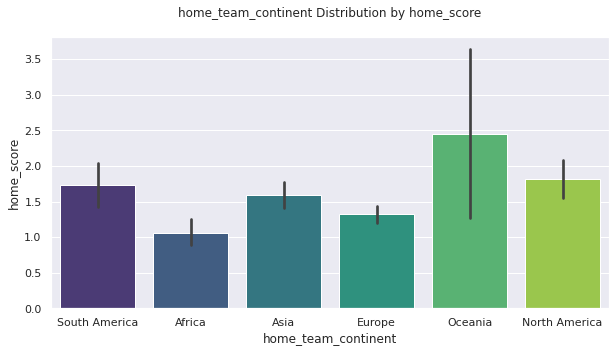

In [287]:
# Continent vs Home score
BarPlotBiv('home_team_continent', 'home_score', merged)

Teams in Oceania have the highest home scores.

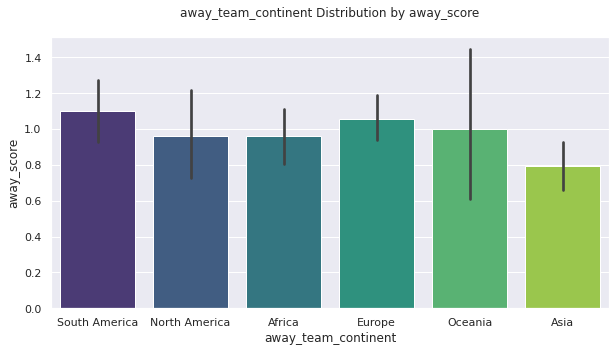

In [288]:
# Continent vs Away score
BarPlotBiv('away_team_continent', 'away_score', merged)

Countires in South America have the highest away scores, closely followed by those in Europe.

**Continent Vs Rank**

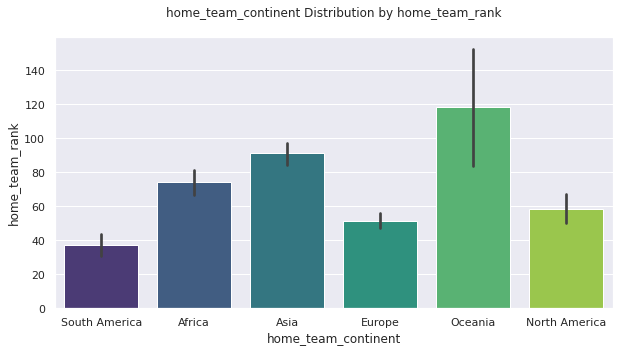

In [289]:
# Continent Vs Home team rank
BarPlotBiv('home_team_continent', 'home_team_rank', merged)

Teams in South America and Europe have the highest home team ranks.

**NB:** the lower the rank, the betterthe performance.

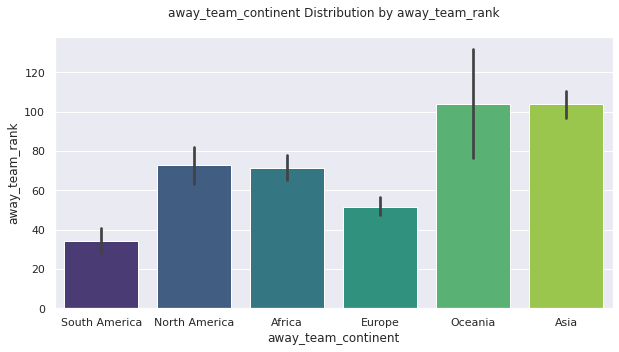

In [290]:
# Continent Vs Away team rank
BarPlotBiv('away_team_continent', 'away_team_rank', merged)

They also have the highest away team ranks.

Multivariate analysis will be carried out in the section below. Linear Discriminant Analysis will be applied, as the dataset has a label columns (Supervised Machine Learning).

## Modelling

#### Encoding Categorical Columns

In [291]:
# Feature engineering
merged_modelling = merged.copy()
# Seperating the date column
merged_modelling['year'] = merged_modelling.date.dt.year
merged_modelling['month'] = merged_modelling.date.dt.month
merged_modelling['day'] = merged_modelling.date.dt.day

In [292]:
# Checking changes
merged_modelling.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status,home_team_continent,away_team_continent,year,month,day
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,W,South America,South America,1993,8,8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,14,D,South America,North America,1993,8,8
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,W,South America,South America,1993,8,8
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,86,W,Africa,Africa,1993,8,8
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5,L,South America,South America,1993,8,8


In [293]:
# Dropping the date column
merged_modelling.drop('date', axis = 1, inplace = True)

#### Multicollinearity Check

In [294]:
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

# Function call
VIF(merged_modelling)

,home_score,away_score,home_team_rank,away_team_rank,year,month,day
home_score,1.171777,-0.010763,0.379826,-0.523845,0.088113,0.015306,0.024621
away_score,-0.010763,1.087033,-0.284514,0.343790,0.019268,0.011638,-0.002334
home_team_rank,0.379826,-0.284514,1.616436,-0.989427,-0.114847,0.096460,-0.078968
away_team_rank,-0.523845,0.343790,-0.989427,1.796660,-0.239842,-0.048691,0.061327
year,0.088113,0.019268,-0.114847,-0.239842,1.425580,0.002645,0.668527
month,0.015306,0.011638,0.096460,-0.048691,0.002645,1.024783,-0.135397
day,0.024621,-0.002334,-0.078968,0.061327,0.668527,-0.135397,1.356682


All VIFs are lower than 5, therefore, multicollinearity is not an issue.

In [295]:
categorical = list(merged_modelling.select_dtypes(include = 'object').columns)
for cat in categorical:
  print(f'{cat}: {len(merged_modelling[cat].unique())}')

home_team: 153
away_team: 154
tournament: 37
status: 3
home_team_continent: 6
away_team_continent: 6


All columns are nominal. Due to the large number of classes in each categorical column, label encoding will be used.

In [296]:
# Label encoding
merged_modelling[categorical] = merged_modelling[categorical].apply(LabelEncoder().fit_transform)
merged_modelling.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status,home_team_continent,away_team_continent,year,month,day
0,17,145,3,1,15,59,22,2,5,5,1993,8,8
1,20,87,1,1,16,8,14,0,5,3,1993,8,8
2,37,148,5,0,15,35,94,2,5,5,1993,8,8
3,55,120,1,0,16,65,86,2,0,0,1993,8,8
4,105,6,1,3,15,67,5,1,5,5,1993,8,8


**Function Definition**

*LDA*

In [297]:
# LDA function
def Lda(degree, X_train, X_test, y_train, y_test, components = None):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  print(f'RMSE: {Polynomial(degree, X_train, X_test, y_train, y_test)}')


In [298]:
# LDA without scaling
def Lda_noscale(degree, X_train, X_test, y_train, y_test, components = None):
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  print(f'RMSE: {Polynomial(degree, X_train, X_test, y_train, y_test)}')

*Residul plot and Heteroskedasticity* 

In [299]:
# Residul plot and Heteroskedasticity with LDA
def Residuals_Heteroskedasticity_LDA(degree, X_train, X_test, y_train, y_test, components = None):
  # LDA
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degree)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Obtaining ID arrays
  ypred = y_pred_poly.flatten()
  ytest = y_test.flatten()
  # Residuals
  residuals = np.subtract(ypred, ytest)
  print('Residuals Description')
  print(pd.DataFrame(residuals).describe())
  mean = residuals.mean()
  print(f'\nResiduals mean: {mean}')
  
  # Residual plot
  plt.scatter(ypred, residuals, color='black')
  plt.ylabel('Residuals')
  plt.xlabel('Fitted Values')
  plt.axhline(y= mean, color='red', linewidth=1)
  plt.show()

  # Bartlett's test
  test_statistic, p_value = bartlett(ypred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(ypred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')

In [300]:
# # Residul plot and Heteroskedasticity without LDA
def Residuals_Heteroskedasticity(degree, X_train, X_test, y_train, y_test, components = None):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degree)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Obtaining ID arrays
  ypred = y_pred_poly.flatten()
  ytest = y_test.flatten()
  # Residuals
  residuals = np.subtract(ypred, ytest)
  print('Residuals Description')
  print(pd.DataFrame(residuals).describe())
  mean = residuals.mean()
  print(f'\nResiduals mean: {mean}')
  
  # Residual plot
  plt.scatter(ypred, residuals, color='black')
  plt.ylabel('Residuals')
  plt.xlabel('Fitted Values')
  plt.axhline(y= mean, color='red', linewidth=1)
  plt.show()

  # Bartlett's test
  test_statistic, p_value = bartlett(ypred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(ypred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')

*Polynomial Regression* 

In [301]:
# Polynomial Regression function
def Polynomial(degrees, X_train, X_test, y_train, y_test):
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degrees)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Model accuracy
  rmse_poly = mean_squared_error(y_test, y_pred_poly , squared = False)
  return rmse_poly

*Logistic Regression*

In [302]:
# Logistic Regression with LDA
def LogisticReg_LDA(X_train, X_test, y_train, y_test, components = None):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Dimensionality reduction  
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  # Model fitting
  log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
  log_reg.fit(X_train, y_train)
  # Prediction
  y_pred = log_reg.predict(X_test)
  # Evaluation
  score = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Accuracy score: {score}')
  print('\nClassification Report')
  print(report)
  confusion= confusion_matrix(y_test, y_pred)
  print('\nConfusion Matrix')
  print(confusion)

In [303]:
# Logistic Regression without LDA
def LogisticReg(X_train, X_test, y_train, y_test):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Model fitting
  log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
  log_reg.fit(X_train, y_train)
  # Prediction
  y_pred = log_reg.predict(X_test)
  # Evaluation
  score = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Accuracy score: {score}')
  print('\nClassification Report')
  confusion= confusion_matrix(y_test, y_pred)
  print('\nConfusion Matrix')
  print(confusion)

**Train-Test Split**

Normal train-test-split will be applied to gauge the initial performance of the models in the absence optimization methods.

*Train-test sets*

In [304]:
# Home team score prediction sets
X1 =  merged_modelling.drop('home_score', axis = 1).values
y1 = merged_modelling.home_score.values.reshape(-1, 1)

In [305]:
# Away team score prediction sets
X2 =  merged_modelling.drop('away_score', axis = 1).values
y2 = merged_modelling.away_score.values.reshape(-1, 1)

In [306]:
# Status prediction sets
X3 =  merged_modelling.drop('status', axis = 1).values
y3 = merged_modelling.status.values.reshape(-1, 1)

*Normal train-test-split*

In [307]:
# Home team score prediction
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [308]:
# Away team score prediction
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [309]:
# Status prediction
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

**Polynomial Regression**

*Home team score*

Determining the optimal polynomial equation by varying the degree of the independent variables.

In [310]:
# Degree of 1
Polynomial(1, X1_train, X1_test, y1_train, y1_test)

0.9540313443131838

In [311]:
# Degree 2
Polynomial(2, X1_train, X1_test, y1_train, y1_test)

0.8333044500940151

In [312]:
# Degree of 3
Polynomial(3, X1_train, X1_test, y1_train, y1_test)

3.103098999715805

For the home team score prediction set, a polynomial equation whose independent variable is of degree 2 has the lowest RMSE, therefore, the optimal equation is quadratic.

*Away team score*

In [313]:
# Degree 1
Polynomial(1, X2_train, X2_test, y2_train, y2_test)

0.9126577626985714

In [314]:
# Degree 2
Polynomial(2, X2_train, X2_test, y2_train, y2_test)

0.6697472586661538

In [315]:
# Degree 3
Polynomial(3, X2_train, X2_test, y2_train, y2_test)

3.4534098915621128

For the away team score prediction set, a polynomial equation whose independent variable is of degree 2 has the lowest RMSE.

**Logistic Regression**

*Status*

In [316]:
LogisticReg(X3_train, X3_test, y3_train, y3_test)

Accuracy score: 1.0

Classification Report

Confusion Matrix
[[41  0  0]
 [ 0 43  0]
 [ 0  0 84]]


The model achieves a perfect score. This could mean that it is overfitting. Further analysis is required.

**Polynomial regression after dimensionality reduction**

**Home Team Score**

In [317]:
# LDA, y = home team score
# Components = None
Lda(2, X1_train, X1_test, y1_train, y1_test)

RMSE: 0.8849866780845018


In [318]:
# LDA, y = home team score
# Components = 1
Lda(2, X1_train, X1_test, y1_train, y1_test, components = 1)

RMSE: 0.9215900133406104


In [319]:
# LDA, y = home team score
# Components = 2
Lda(2, X1_train, X1_test, y1_train, y1_test, components = 2)

RMSE: 0.9161312031128566


* The, the optimal number of components is None. Furthermore, scaling the entire dataset and only scaling the numerical columns leads to the same RMSE.

* y = home team score: (Previous =  RMSE 0.8333), though there is a slight increase in RMSE, LDA will still be applied.

In [320]:
# LDA, y = away team score
# Components = None
Lda(2, X2_train, X2_test, y2_train, y2_test)

RMSE: 0.9043169652932771


In [321]:
# LDA, y = away team score
# Components = 1
Lda(2,X2_train, X2_test, y2_train, y2_test, components = 1)

RMSE: 0.9242654296212476


In [322]:
# LDA, y = away team score
# Components = 2
Lda(2, X2_train, X2_test, y2_train, y2_test, components = 2)

RMSE: 0.9149514941688183


In [323]:
# LDA, y = away team score
# Components = 3
Lda(2, X2_train, X2_test, y2_train, y2_test, components = 3)

RMSE: 0.9044614800321665


* Therefore, the optimal number of components is None. However, the RMSE increses.

* y = away team score: (Previous =  RMSE 0.6697). There  increase in RMSE is significant, therefore, LDA will not be applied.

In [324]:
# LDA wothout scaling for y = away team score
Lda_noscale(2, X2_train, X2_test, y2_train, y2_test)

RMSE: 0.9043169652932769


As per the results, LDA led to an increase in RMSE, therefore, it will not be employed.

*Status*

In [325]:
# y = status
# Components  = None
LogisticReg_LDA(X3_train, X3_test, y3_train, y3_test)

Accuracy score: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        84

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168


Confusion Matrix
[[41  0  0]
 [ 0 43  0]
 [ 0  0 84]]


In [326]:
# y = status
# Components  = 1
LogisticReg_LDA(X3_train, X3_test, y3_train, y3_test, components = 1)

Accuracy score: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        84

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168


Confusion Matrix
[[41  0  0]
 [ 0 43  0]
 [ 0  0 84]]


In [327]:
# y = status
# Components  = 2
LogisticReg_LDA(X3_train, X3_test, y3_train, y3_test, components = 2)

Accuracy score: 1.0

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        84

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168


Confusion Matrix
[[41  0  0]
 [ 0 43  0]
 [ 0  0 84]]


y = status: 

Highest accuracy = 0.8628571428571429 before continent columns were added.

All components will be considered as all comonent variations have perfect accuracies. This could be a sign of overfitting, therefore, other classification models will be used to negate or confirm this.

**Residuals and Heteroscedasticity**

Further model optimization will employ LeaveOneOut cross validation, therefore, Heteroscedasticity will be checked at this point, as the cross validation method only makes predictions on one record, therefore, only one point will appear on the residual plot.

*Home Team Score*

Residuals Description
                0
count  168.000000
mean     0.061545
std      0.885483
min     -2.989244
25%     -0.450848
50%      0.162822
75%      0.727017
max      2.662047

Residuals mean: 0.061545333237016726


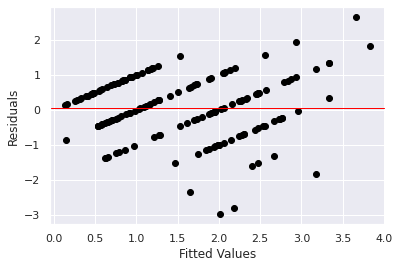


P_Vlaue = 0.6403758163810171
test_statistic = 0.21825099445405094
Critical Value: 160.84582558983186
Variances are equal


In [328]:
# y = home team score
Residuals_Heteroskedasticity_LDA(2, X1_train, X1_test, y1_train, y1_test)

* From the Bartlett's test, there insufficient evidence to reject the null hypotheis of equal variance (homoscedasticity) of the data points as the p-value > 0.05.
* The pattern observed is caused by the discrete values in the y_test and prediction sets.

*Away Team Score*

Residuals Description
                0
count  168.000000
mean     0.082273
std      0.760641
min     -2.926721
25%     -0.196868
50%      0.083831
75%      0.571841
max      2.480155

Residuals mean: 0.08227302506467392


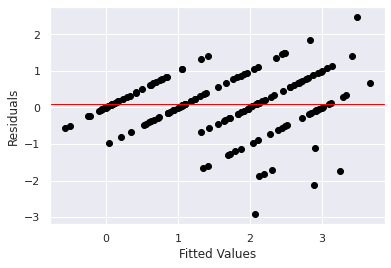


P_Vlaue = 5.845549307030296e-05
test_statistic = 16.15204271301855
Critical Value: 248.0081248674155
Variances are equal


In [329]:
# y = away team score
# As the RMSE increased after LDA, the dimensionality reduction method will not be employed.
Residuals_Heteroskedasticity(2, X1_train, X1_test, y1_train, y1_test, 1)

* From the Bartlett's test, there insufficient evidence to reject the null hypotheis of equal variance (homoscedasticity) of the data points as the p-value > 0.05.
* The pattern observed is caused by the discrete values in the y_test and prediction sets.

*Status*

For the y = status logistic linear regression, a residual plot will not be generated as differences cannot be calculated for nominal categories, as they have no order, nor quantitative value. 

In [330]:
# Number of records
merged_modelling.shape[0]

839

##### Cross Validation

Employing Leave One Out Cross Validation as the dataset only has around 839 records.

**Function Definition**

*Polynomial Regression*

In [152]:
# LeaveOneOut cross validation with LDA for polynomial regression
def LeaveOutCV_LDA(X, y, degree, components):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  RMSES = [] 
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LDA
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    lda = LDA(n_components= components)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    rmse_value = Polynomial(degree, X_train, X_test, y_train, y_test)
    RMSES.append(rmse_value)    
    count = count + 1
  # Number of models and the mean RMSE of all of them.
  print(f'Models = {str(count)}')
  print(f'Mean RMSE = {np.mean(RMSES)}')
  # Plot
  plt.plot(RMSES)
  plt.ylabel('RMSE value')
  plt.xlabel('model ID')
  plt.show()

  

In [153]:
# LeaveOneOut cross validation without LDA for polynomial regression.
def LeaveOutCV(X, y, degree):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  RMSES = [] 
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LDA
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    rmse_value = Polynomial(degree, X_train, X_test, y_train, y_test)
    RMSES.append(rmse_value)    
    count = count + 1
  # Number of models and the mean RMSE of all of them.
  print(f'Models = {str(count)}')
  print(f'Mean RMSE = {np.mean(RMSES)}')
  # Plot
  plt.plot(RMSES)
  plt.ylabel('RMSE value')
  plt.xlabel('model ID')
  plt.show()

  

*Logistic Regression*

In [154]:
# LeaveOneOut cross validation with LDA for logistic regression
def LeaveOutCV_Logistic_LDA(X, y, components = None):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  accuracies = []
  f1s = []
  precisions = []
  recalls = []
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    # LDA
    lda = LDA(n_components= components)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    # Model fitting
    log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
    log_reg.fit(X_train, y_train)
    # Prediction
    y_pred = log_reg.predict(X_test)
    # Evaluation
    score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    accuracies.append(score)
    f1s.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    report = classification_report(y_test, y_pred)
    model.append(count)
    count += 1
  print(f'Models trained: {len(model)}')
  print('\Classification report for the final model')
  print(report)
  print(f'\nMean Accuracy score: {np.mean(score)}\n')
  print(f'Mean F1 score: {np.mean(f1s)}\n')
  print(f'Mean Precision score: {np.mean(precisions)}\n')



  

*Home Team Score*

Models = 839
Mean RMSE = 0.7205687858164542


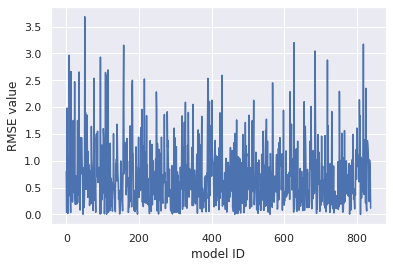

In [155]:
# y = home team score
LeaveOutCV_LDA(X1, y1, 2, None)

* The RMSE has reduced from 1.0766 to 0.9813. An of around 0.9 seems to be the best that can be achieved without the continent columns.
* With the columns, the RMSE drops to 0.7206, therefore, the model is fitting the data points more accurately.

*Away Team Score*

Models = 839
Mean RMSE = 0.45669220618276235


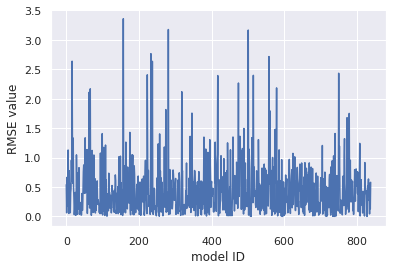

In [156]:
# y = away team score
LeaveOutCV(X2, y2, 2)

* The RMSE has reduced from 0.9435 to 0.5391 after LeaveOveOut cross validation (without continent columns).
* With the continent columns, the RMSE drop to 0.4567, which is a better result.

*Status*

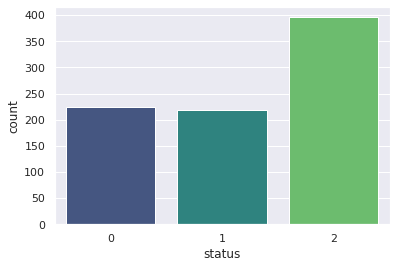

In [157]:
# Checking for class imbalance
sns.countplot(x='status',data= merged_modelling, palette='viridis')

* There is a class imbalance between the draw and loss classes, and the win class. Therefore, weighted averages will be used to compute the F1, precision and recall scores.
*  Accuracy is considered a poor choice for imbalanced datasets as it gives high scores to models which just predict the most frequent class.


In [158]:
# y = status
LeaveOutCV_Logistic_LDA(X3, y3)

Models trained: 839
\Classification report for the final model
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Mean Accuracy score: 1.0

Mean F1 score: 0.9976162097735399

Mean Precision score: 0.9976162097735399



All scores have improved.

##### Hyperparameter Tuning

As the LinearRgression model does not have hyperparameters [link](https://www.analyticsvidhya.com/blog/2021/04/evaluating-machine-learning-models-hyperparameter-tuning/) [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), therefore, the Ridge linear regression model will be used.

In [159]:
# Hyperparameters dictionary
grid = dict()
grid ['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
grid ['alpha'] = np.arange(0, 1, 0.01)
grid ['fit_intercept'] = [True, False]
grid ['normalize'] = [True, False]

**Grid Search**

**Ridge Regression**

In [160]:
# Grid search function with LDA for ridge regression
def Grid_LDA(X, y, params, folds, components = None):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # LDA
  lda = LDA(n_components= components)
  X = lda.fit_transform(X, y)
  # Model
  model = Ridge()
  # Grid search
  grid = GridSearchCV(model, params, scoring = 'neg_root_mean_squared_error', cv = folds, verbose = 1, n_jobs = -1)
  # Hyperparameter tuning
  grid.fit(X, y)
  # Best parameters
  print(f'Best parameters: {grid.best_params_}')
  # Best scores
  print(f'Best scores: {grid.best_score_}')



In [161]:
# Grid search function without LDA for ridge regression
def Grid(X, y, params, folds):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # Model
  model = Ridge()
  # Grid search
  grid = GridSearchCV(model, params, scoring = 'neg_root_mean_squared_error', cv = folds, verbose = 1, n_jobs = -1)
  # Hyperparameter tuning
  grid.fit(X, y)
  # Best parameters
  print(f'Best parameters: {grid.best_params_}')
  # Best scores
  print(f'Best scores: {grid.best_score_}')

*Logistic Regression*

In [162]:
# Grid search function with LDA for logistic regression
def Grid_Logistic_LDA(X, y, params, folds, components = None):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # LDA
  lda = LDA(n_components= components)
  X = lda.fit_transform(X, y)
  # Model fitting
  model = LogisticRegression(multi_class='auto', solver='lbfgs')
  # Grid search
  # The classes are imbalanced, therefore, f1 weighted score will be used.
  grid = GridSearchCV(model, params, scoring = 'f1_weighted', cv = folds, verbose = 1, n_jobs = -1)
  # Hyperparameter tuning
  grid.fit(X, y)
  # Best parameters
  print(f'Best parameters: {grid.best_params_}')
  # Best scores
  print(f'Best scores: {grid.best_score_}')

*Home Team Score - Ridge Regression*

In [163]:
# Grid Search
# y = home team score
Grid_LDA(X1, y1, grid,10)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Best parameters: {'alpha': 0.67, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}
Best scores: -0.9875317635831766


*Away Team Score - Ridge Regression*

In [164]:
# y = away team score
Grid(X2, y2, grid, 10)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Best parameters: {'alpha': 0.05, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}
Best scores: -0.9890380821584517


The best parameters for the Ridge regression model are:
* Home team
1. alpha = 0.13
2. fit_intercept = True
3. normalize = False
4. solver = sag

* Away team
1. alpha = 0.05
2. fit_intercept = True
3. normalize = True
4. solver = lsqr

Ridge regression has a lower performance. However, this could be caused by the low number of folds (10), as compared to the 871 folds used previously. This will not be confirmed as the procedure is computationally expensive. However, Random Forest Regressor will be used to compare the performance of both models.

**RandomForestRegressor**

*Function Definition*

In [165]:
# Random forest regressor grid search
# Hyperparameters to be tested
rf_grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}




In [166]:
# Random forest regressor grid search with LDA
def RSearch_LDA(X, y, params, folds, components = None):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # LDA
  lda = LDA(n_components= components)
  X = lda.fit_transform(X, y)
  # Regression model
  model = RandomForestRegressor()
  gs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            scoring = 'neg_root_mean_squared_error',
                            n_iter=100, 
                            cv= folds, 
                            verbose= 1)
  # Model training
  gs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {gs_model.best_params_}')
  # Best scores
  print(f'Best scores: {gs_model.best_score_}')

In [167]:
# Random forest classifier grid search with LDA
def RSearch_Logistic_LDA(X, y, params, folds, components = None):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # LDA
  lda = LDA(n_components= components)
  X = lda.fit_transform(X, y)
  # Regression model
  model = RandomForestClassifier()
  gs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            scoring = 'f1_weighted',
                            n_iter=100, 
                            cv= folds, 
                            verbose=1)
  # Model training
  gs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {gs_model.best_params_}')
  # Best scores
  print(f'Best scores: {gs_model.best_score_}')

In [168]:
# Random forest regressor without LDA
def RSearch(X, y, params, folds):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # Regression model
  model = RandomForestRegressor()
  gs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            scoring = 'neg_root_mean_squared_error',
                            n_iter=100,
                            cv= folds,
                            verbose= 1)
  # Model training
  gs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {gs_model.best_params_}')
  # Best scores
  print(f'Best scores: {gs_model.best_score_}')

*Home Team Scores*

In [169]:
# y = home team score
RSearch_LDA(X1, y1, rf_grid, 10)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Best scores: -0.8970900059318355


*Away Team Scores*

In [170]:
# y = away team score
RSearch(X2, y2, rf_grid, 10)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 5}
Best scores: -0.624833848579103


From the results, the RandomForestRegressor has low RMSE values with just 10 folds, as opposed to the 839 folds used with LeaveOneOut cross validation needed to obtain the lowest RMSESs obtained so far. 

**Logistic Regression Hyperparameter Tuning**

In [171]:
# y = stautus

# Hyperparameters
logistic_params = dict()
logistic_params['solver'] =  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
logistic_params['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
logistic_params['C'] = [100, 10, 1.0, 0.1, 0.01]

In [172]:
# Grid Search
# folds = 2
Grid_Logistic_LDA(X3, y3, folds = 2, params = logistic_params)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
Best scores: 0.9976133651551313


In [173]:
# Grid Search
# folds = 3
Grid_Logistic_LDA(X3, y3, folds = 3, params = logistic_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
Best scores: 0.9988069415980809


In [174]:
# Grid Search
# folds = 5
Grid_Logistic_LDA(X3, y3, folds = 5, params = logistic_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
Best scores: 0.9976190476190476


In [175]:
# Grid Search
# folds = 10
Grid_Logistic_LDA(X3, y3, folds = 10, params = logistic_params)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best scores: 0.9988038309557297


In [176]:
# Grid Search
# folds = 200
Grid_Logistic_LDA(X3, y3, folds = 200, params = logistic_params)

Fitting 200 folds for each of 100 candidates, totalling 20000 fits
Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best scores: 0.9982500000000001


Grid search with 3 folds has the highest F1 score. The F1 score changes with the number of folds.

The best hyperparameters are:
1. C = 100
2. Penalty = None
3. Solver = lbfgs


**Random Forest Classifier Hyperparameter Tuning**

In [177]:
# Checking the performance with RandomForestClassifier
RSearch_Logistic_LDA(X3, y3, params = rf_grid, folds = 2)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10}
Best scores: 0.9976133651551313


In [178]:
# Checking the performance with RandomForestClassifier
RSearch_Logistic_LDA(X3, y3, params = rf_grid, folds = 5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Best scores: 0.9976190476190476


In [179]:
# Checking the performance with RandomForestClassifier
RSearch_Logistic_LDA(X3, y3, params = rf_grid, folds = 10)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 10, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Best scores: 0.9976190476190476


In [180]:
# Checking the performance with RandomForestClassifier
RSearch_Logistic_LDA(X3, y3, params = rf_grid, folds = 20)

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
Best parameters: {'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best scores: 0.9976190476190476


For the RandomForestClassifier, the F1 score is independent of the number of folds. Unlike the LeaveOneOut cross validation, fewer folds are required to achieve a high accuracy of 0.9976.

Furthermore, varying the hyperparameters does not decrease the accuracy.

Increasing the number of folds increases the computation time.

## 7. Implementing the Solution

The solutions will be implemented using polynomial regression for the home and away team scores, and logistic regression for the match status (result) classification as per the project specifications.

**Team Score Predictions**

As the LinearRegression model does not have hyperparamters, the model with the lowest RMSE values will be used.

**Home Team Score Prediction**

In [181]:
# LeaveOneOut cross validation with LDA for polynomial regression for the home team.
def LeaveOutCV_LDA_Best_Models(X, y, degree, components = None):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  RMSES = [] 
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LDA
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    lda = LDA(n_components= components)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    rmse_value = Polynomial(degree, X_train, X_test, y_train, y_test)
    RMSES.append(rmse_value)    
    count = count + 1
    model.append(count)

  # Model performance dataframe
  best_models = pd.DataFrame({'Model': model, 'RMSE': RMSES})
  best_models.set_index('Model', inplace = True)
  best_models.sort_values('RMSE', inplace = True)
  # Number of models and the mean RMSE of all of them.
  print(f'Models = {str(count)}')
  print(f'Mean RMSE = {np.mean(RMSES)}')
  print(best_models.head())
  return best_models
  

In [182]:
# Getting the model with the lowest RMSE
home_models = LeaveOutCV_LDA_Best_Models(X1, y1, 2, components = None)

Models = 839
Mean RMSE = 0.7205687858164542
           RMSE
Model          
811    0.000952
465    0.002861
562    0.003864
47     0.003908
112    0.004549


Model 811 has the lowest RMSE, however, the value differs greatly from the succeeding models. This indicates that the model test set has unique properties, therefore, model 465 will be used, as it is close to the succeeding values.

In [183]:
# Modifying the function above to obtain the best train and test sets
# LeaveOneOut cross validation with LDA for polynomial regression for the home team.
def LeaveOutCV_LDA_Sets(X, y, degree, target, components = None):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  RMSES = [] 
  count = 0 
  # Target set placeholders
  Xtrain = 0
  Xtest = 0
  ytrain = 0
  ytest = 0
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LDA
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    lda = LDA(n_components= components)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    rmse_value = Polynomial(degree, X_train, X_test, y_train, y_test)
    RMSES.append(rmse_value)    
    count = count + 1
    model.append(count)
    # Getting the best performing sets
    if count == target:
      Xtrain = X_train.copy()
      Xtest = X_test.copy()
      ytrain = y_train.copy()
      ytest = y_test.copy()
    else:
      pass
  return Xtrain, Xtest, ytrain, ytest 

In [204]:
# Best sets
X1_train, X1_test, y1_train, y1_test = LeaveOutCV_LDA_Sets(X1, y1, 2, 465, components = None)

In [185]:
# Altered polynomial fucntion
def Polynomial_Solution(degrees, X_train, X_test, y_train, y_test, target):
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degrees)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Model accuracy
  rmse_poly = mean_squared_error(y_test, y_pred_poly , squared = False)
  print(f'RMSE: {rmse_poly}')
  # Predictions dataframe
  predictions = pd.DataFrame({'Actaual' : y_test.flatten(), 'Predicted': y_pred_poly.flatten()})
  print('Predictions\n')
  # Printing the most recent predictions
  print(predictions, '\n')
  # Getting the actual record
  print('Actual Record \n')
  print(merged.iloc[target, :])

In [205]:
# Home score Prediction
# Model = 465 (started from 1), dataset index = 464
Polynomial_Solution(2, X1_train, X1_test, y1_train, y1_test, 464)

RMSE: 0.002861258348681117
Predictions

   Actaual  Predicted
0        1   0.997139 

Actual Record 

date                   2006-08-16 00:00:00
home_team                            Chile
away_team                         Colombia
home_score                               1
away_score                               2
tournament                        Friendly
home_team_rank                          44
away_team_rank                          29
status                                   L
home_team_continent          South America
away_team_continent          South America
Name: 483, dtype: object


The best set only makes one prediction. The RMSE score is very low. Therefore, the model is making highly accurate predictions with the  provided training and testing sets.

**Away Team Score Prediction**

In [191]:
# LeaveOneOut cross validation without LDA for polynomial regression to obtain best train and test sets
def LeaveOutCV_Best_Models(X, y, degree):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  RMSES = [] 
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LDA
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    rmse_value = Polynomial(degree, X_train, X_test, y_train, y_test)
    RMSES.append(rmse_value)
    count += 1    
    model.append(count)

  # Model performance dataframe
  best_models = pd.DataFrame({'Model': model, 'RMSE': RMSES})
  best_models.set_index('Model', inplace = True)
  best_models.sort_values('RMSE', inplace = True)
  # Number of models and the mean RMSE of all of them.
  print(f'Models = {str(count)}')
  print(f'Mean RMSE = {np.mean(RMSES)}')
  print(best_models.head()) 

In [192]:
# The away team predictions had better results when the model was trained without performing LDA.
# Obtaining the best models
LeaveOutCV_Best_Models(X2, y2, 2)

Models = 839
Mean RMSE = 0.45669220618276235
           RMSE
Model          
739    0.000076
829    0.000403
597    0.000711
510    0.001028
718    0.001302


The best model with the lowest RMSE is 739.

In [193]:
# Function to obtain the best set
# LeaveOneOut cross validation without LDA for polynomial regression to obtain best train and test sets
def LeaveOutCV_Sets(X, y, degree, target):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  RMSES = [] 
  count = 0
  # Target set placeholders
  Xtrain = 0
  Xtest = 0
  ytrain = 0
  ytest = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LDA
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    rmse_value = Polynomial(degree, X_train, X_test, y_train, y_test)
    RMSES.append(rmse_value)
    count += 1    
    model.append(count)
    # Getting the best performing sets
    if count == target:
      Xtrain = X_train.copy()
      Xtest = X_test.copy()
      ytrain = y_train.copy()
      ytest = y_test.copy()
    else:
      pass
  return Xtrain, Xtest, ytrain, ytest 

In [194]:
# Best sets
X2_train, X2_test, y2_train, y2_test = LeaveOutCV_Sets(X2, y2, 2, 739)

In [207]:
# Prediction
# Model = 739 (started from 1), dataset index = 738
Polynomial_Solution(2, X2_train, X2_test, y2_train, y2_test, 738)

RMSE: 7.590899720577582e-05
Predictions

   Actaual  Predicted
0        1   0.999924 

Actual Record 

date                   2010-11-17 00:00:00
home_team                             Iraq
away_team                           Kuwait
home_score                               1
away_score                               1
tournament                        Friendly
home_team_rank                          98
away_team_rank                         105
status                                   D
home_team_continent                   Asia
away_team_continent                   Asia
Name: 765, dtype: object


The RMSE is very low, therefore, the model is making highly accurate predictions with the povided training and testing sets.

**Logistic Regression Status Prediction**

In [196]:
# LeaveOneOut cross validation with LDA for logistic regression best models
def LeaveOutCV_Logistic_LDA_Best_Models(X, y, components = None):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  accuracies = []
  f1s = []
  precisions = []
  recalls = []
  count = 0
  # Target set placeholders
  Xtrain = 0
  Xtest = 0
  ytrain = 0
  ytest = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    # LDA
    lda = LDA(n_components= components)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    # Model fitting
    log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
    log_reg.fit(X_train, y_train)
    # Prediction
    y_pred = log_reg.predict(X_test)
    # Evaluation
    score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    accuracies.append(score)
    f1s.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    report = classification_report(y_test, y_pred)
    count += 1
    model.append(count)

  # Displaying classification scores  
  print(f'Models trained: {len(model)}')
  print('\Classification report for the final model')
  print(report)
  print(f'\nMean Accuracy score: {np.mean(score)}\n')
  print(f'Mean F1 score: {np.mean(f1s)}\n')
  print(f'Mean Precision score: {np.mean(precisions)}\n')

  # Model performance dataframe
  best_models = pd.DataFrame({'Model': model, 'F1_Score': f1s, 'Precision': precisions, 'Recall': recalls})
  best_models.set_index('Model', inplace = True)
  best_models.sort_values('F1_Score', ascending = False, inplace = True)
  # Number of models and the mean RMSE of all of them.
  print(f'Models = {str(count)}')
  print(f'Mean RMSE = {np.mean(f1s)}')
  print(best_models.head())   

In [197]:
# Best models
LeaveOutCV_Logistic_LDA_Best_Models(X3, y3, components = None)

Models trained: 839
\Classification report for the final model
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Mean Accuracy score: 1.0

Mean F1 score: 0.9976162097735399

Mean Precision score: 0.9976162097735399

Models = 839
Mean RMSE = 0.9976162097735399
       F1_Score  Precision  Recall
Model                             
1           1.0        1.0     1.0
525         1.0        1.0     1.0
553         1.0        1.0     1.0
554         1.0        1.0     1.0
555         1.0        1.0     1.0


All the models above have perfect classification scores. The last model, 555 will be used.

In [198]:
# LeaveOneOut cross validation with LDA for logistic regression best training and testing sets
def LeaveOutCV_Logistic_LDA_Sets(X, y, target, components = None):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  accuracies = []
  f1s = []
  precisions = []
  recalls = []
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    # LDA
    lda = LDA(n_components= components)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    # Model fitting
    log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
    log_reg.fit(X_train, y_train)
    # Prediction
    y_pred = log_reg.predict(X_test)
    # Evaluation
    score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    accuracies.append(score)
    f1s.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    report = classification_report(y_test, y_pred)
    count += 1
    model.append(count)
    # Getting the best performing sets
    if count == target:
      Xtrain = X_train.copy()
      Xtest = X_test.copy()
      ytrain = y_train.copy()
      ytest = y_test.copy()
    else:
      pass
  return Xtrain, Xtest, ytrain, ytest   

In [199]:
# Best sets
X3_train, X3_test, y3_train, y3_test = LeaveOutCV_Logistic_LDA_Sets(X3, y3, 555)

In [200]:
# Prediction
# Logistic Regression with LDA altered solution function.
# Emploting the best hyperparameters
def LogisticReg_LDA_Solution(X_train, X_test, y_train, y_test, target, components = None):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Dimensionality reduction  
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  # Model fitting
  log_reg = LogisticRegression(C = 100, penalty = 'none', multi_class='auto', solver='lbfgs')
  log_reg.fit(X_train, y_train)
  # Prediction
  y_pred = log_reg.predict(X_test)
  # Evaluation
  score = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Accuracy score: {score}')
  print('\nClassification Report')
  print(report)
  # Predictions
  prediction = pd.DataFrame({'Actual': y_test.flatten(), 'Prediction': y_pred.flatten()})
  print('\nPredictions')
  print(prediction.head(), '\n')
  # Getting the actual record
  print('Actual Record \n')
  print(merged.iloc[target, :])

In [208]:
# Predictions
# Model = 555 (started from 1), dataset index = 554
LogisticReg_LDA_Solution(X3_train, X3_test, y3_train, y3_test, 554)

Accuracy score: 1.0

Classification Report
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Predictions
   Actual  Prediction
0       2           2 

Actual Record 

date                           2008-04-09 00:00:00
home_team                                  Lebanon
away_team                                 Maldives
home_score                                       4
away_score                                       0
tournament             AFC Asian Cup qualification
home_team_rank                                 148
away_team_rank                                 159
status                                           W
home_team_continent                           Asia
away_team_continent                           Asia
Name: 576, dtype: object


* A loss by the home team has been accurately predicted.
* From the model performance, the high F1 scores are not as a result of overfitting, but that the model was able to learn most of the important patterns from the data.

## 8. Challenging the solution

Challenging the solution has been done by comparing model performance, with and without the continents columns, scaling the numerical columns only, scaling all columns, comparing performance with and without LDA and comparing the performance of various models. The results of these procedures have been recorded above. Some of the observations and conlusions made include:

* After adding the continent columns, the RMSEs went down and the accuracy, f1, precision and recall scores went up. This could be caused by the models learning more patterns from the data.
* LDA on the away team score prediction led to higher RMSE score, therefore, it was not implemented for the second prediction problem.

## 9. Conclusion

In conlusion, optimization methods implemented that led to reduced RMSEs or high F1 scores included generation of new continent columns (ths greatly impoved how well the models fit the data), scaling, performing LDA,  and using LeaveOneOut cross validation to determine the optimal model, and the training and testing sets that led to optimal results.

Furthermore, models such the RandomForestRegressor and RandomForestClassifier have low RMSE and high F1 scores respectively, for fewer folds of data. Therefore, implemetning them may lead to high model performance with lower computational costs. Moreover, the RandomForestRegressor has multiple hyperparameters that lead to higher model efficiency and performance when properly chosen, while polynomial regression, that implements LinearRegression, lacks hyperparameters [link](https://www.analyticsvidhya.com/blog/2021/04/evaluating-machine-learning-models-hyperparameter-tuning/#:~:text=Hyperparameters%3A%20Vanilla%20linear%20regression%20does,have%20regularization%20as%20a%20hyperparameter).

## 10. Follow up questions

### a). Did we have the right data?

Yes, we have the right data as trianing the models on the data led to obtaining RMSEs of < 1 for the polynomial regression model predictions, and high accuracy scores of > 0.9 for the logistic regression model predictions.


### b). Do we need other data to answer our question?

More granulated data might increase the prediction accuracy of the models, by providing more insights that help the models learn better. This might also reduce the optimization procedures required to obtain accurate results.


### c). Did we have the right question?

Yes, as the models were able to make highly accurate predictions.